# Домашнее задание. Pandas

In [ ]:
import pandas as pd
df = pd.read_csv('data/TSLA.csv');

1. Вывести все колонки из DataFrame

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


2. Посчитать среднюю цену закрытия акций Tesla, в период с открытия по 10.01.2012

In [ ]:
df1 = df.set_index('Date') # устанавливаем столбец Date в качестве индекса
df1 = df1.loc['2010-06-29':'2012-01-10']
df1['Close'].mean()

25.654458737113405

3. Вывести график цены закрытия

<Axes: >

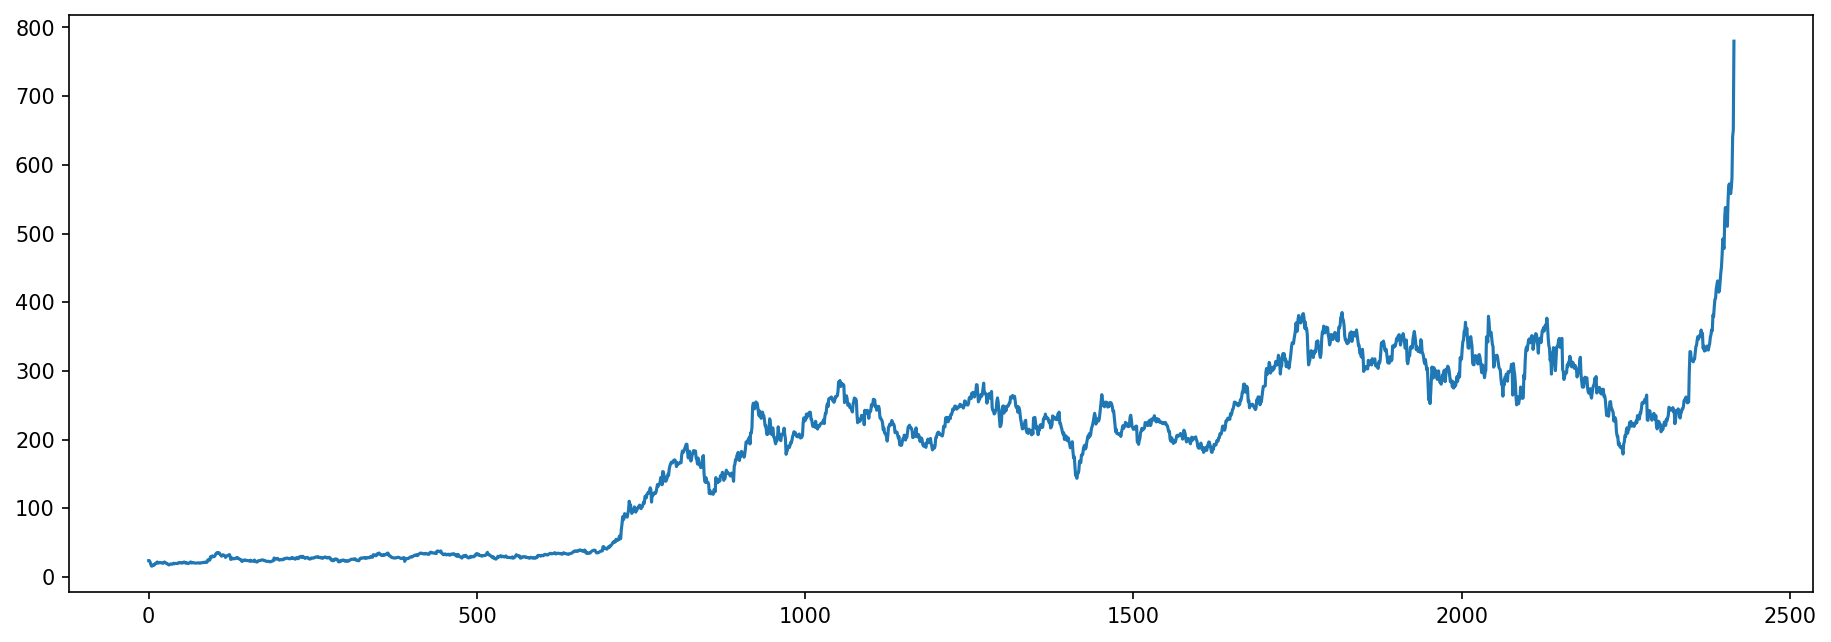

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(15, 5), dpi=150)
df['Close'].plot()

4. Нормализация

Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [ ]:
df2 = df.copy()
def normalize(x):
    min_df = df2['Open'].min()
    max_df = df2['Open'].max()
    return (x - min_df) / (max_df - min_df)
df2['Open'] = df2['Open'].apply(normalize)
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,0.004349,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,0.014676,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,0.013474,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,0.010433,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,0.005870,20.00,15.830000,16.110001,16.110001,6866900


5. Что такое SMA (Simple Moving Average) с окном 12,15,30.
Можно посмотреть внешние решения:
- https://www.pythonpool.com/moving-average-python/   
- https://mrjbq7.github.io/ta-lib/

SMA (Simple Moving Average, простое скользящее среднее) — это метод анализа временных рядов, который используется для сглаживания данных. Он представляет собой усреднение значений временного ряда в течение определенного периода времени.

Один из наиболее распространенных и полезных способов использования скользящего среднего — его расчет на основе прошлых точек данных и использование для прогнозирования будущих значений. Это особенно полезно при работе с данными временных рядов, такими как цены на акции, погодные условия или тенденции продаж. Сглаживая колебания и шум в данных, скользящее среднее может выявить основную тенденцию и помочь нам сделать более точные прогнозы.

SMA с окном 12, 15, 30 означает, что мы рассчитываем SMA для каждой точки данных (усредненное значение величины для каждого последовательного набора из временных интервалов, начиная с первого), используя окно размером 12, 15 и 30 периодов соответственно. Например, если мы имеем временной ряд цен на акции за 60 дней, то при использовании окна SMA, равного 15, поскольку у нас есть только 60 дней и окно размером 15, мы можем получить последовательность SMA значений для каждого из 46 дней. Аналогично, мы можем рассчитать SMA с окнами 12 и 30 периодов.

Использование различных окон SMA позволяет нам получить различные уровни сглаживания данных. Чем больше окно, тем более сглаженными будут данные, но за счет этого мы можем потерять некоторые детали и изменения в данных.

6. Построить график с ценой закрытия и посчитаным SMA 12,15,30

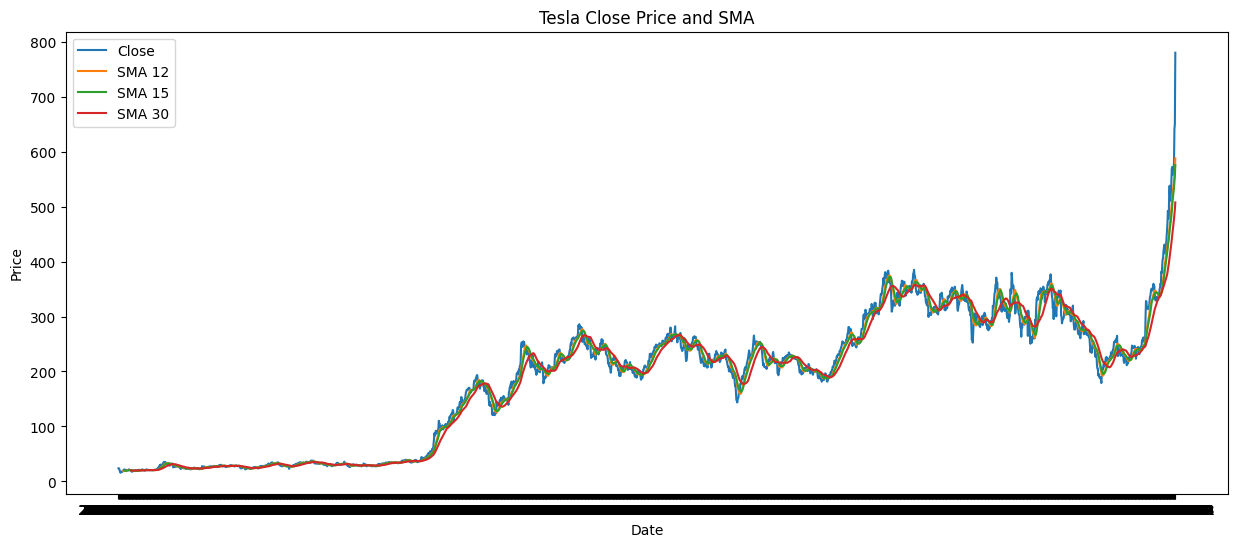

In [ ]:
import matplotlib.pyplot as plt

df3 = df.copy()
df3 = df.set_index('Date')
sma_12 = df['Close'].rolling(window = 12).mean()
sma_15 = df['Close'].rolling(window = 15).mean()
sma_30 = df['Close'].rolling(window = 30).mean()

fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(df3.index, df3['Close'], label='Close')
ax.plot(df3.index, sma_12, label='SMA 12')
ax.plot(df3.index, sma_15, label='SMA 15')
ax.plot(df3.index, sma_30, label='SMA 30')
ax.legend()
ax.set_title('Tesla Close Price and SMA')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

7. Посмотрите на график и подумайте, о чем говорит SMA. Когда стоит начать покупать/продавать акции Tesla?

SMA используется для оценки текущего направления тренда на рынке. Когда цена закрытия выше SMA, это может указывать, что на рынке доминирует бычий тренд (стоит покупать акции). Если цена закрытия находится ниже SMA, то это указывает на медвежий тренд - стоит продать акции.
SMA 30 более плавный, чем SMA 12 и 15, и не реагирует так быстро на изменения. Этот показатель позволяет получить более долгосрочную картину на рынке. Однако, на данном графике SMA 30 находится ниже цены закрытия, что может указывать на то, что на рынке доминирует медвежий тренд.